In [1]:
# IMPORTING THE NECESSARY LIBRARIES
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# SPLITTING THE DATASET FOR TESTING AND TRAINING
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(x_train, y_train, epochs=3)

model.save('handwritten.model.keras')

C:\Users\IDOGUN FAVOUR\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.8677 - loss: 0.4684
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9649 - loss: 0.1136
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9771 - loss: 0.0736


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
This digit is probably a 8


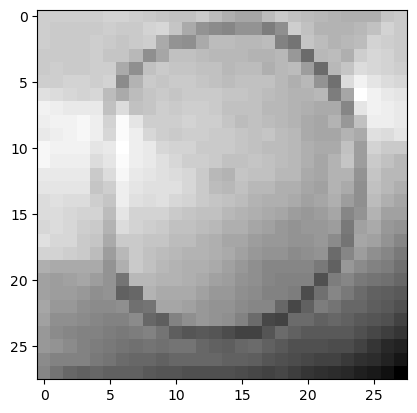

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This digit is probably a 8


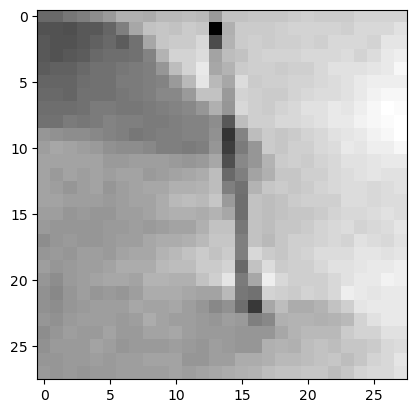

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
This digit is probably a 6


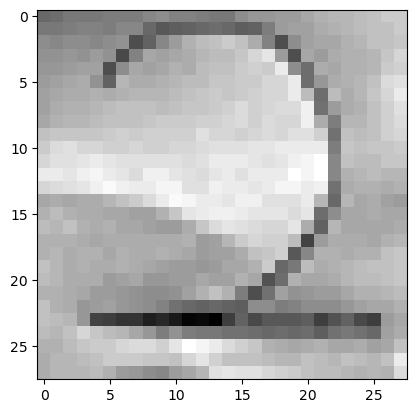

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
This digit is probably a 8


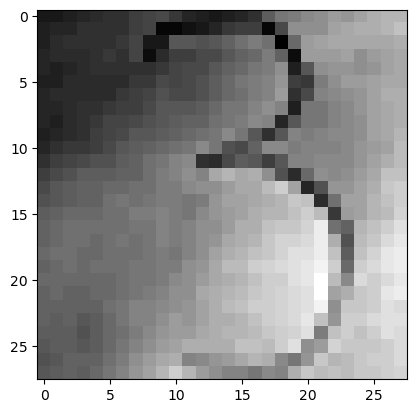

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
This digit is probably a 8


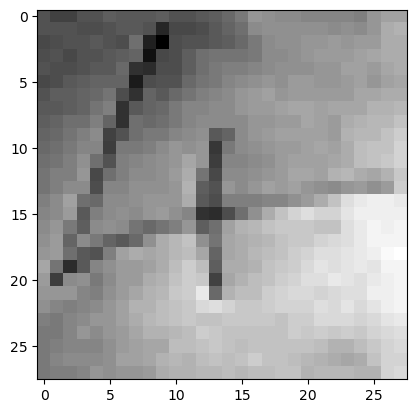

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
This digit is probably a 8


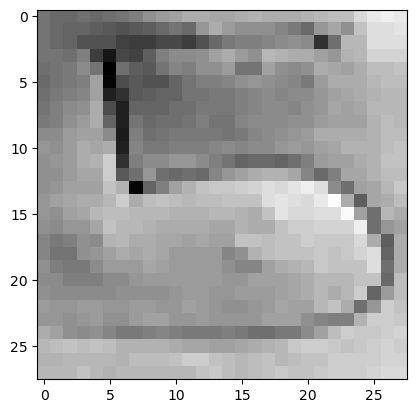

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
This digit is probably a 8


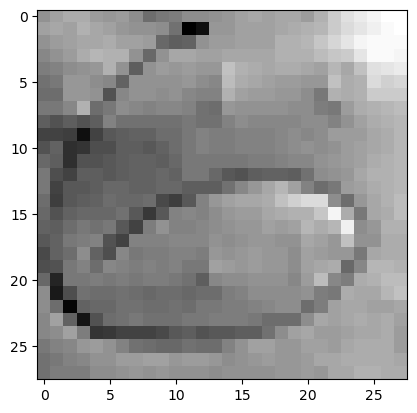

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
This digit is probably a 8


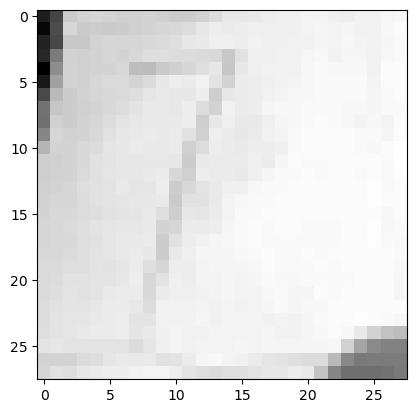

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
This digit is probably a 8


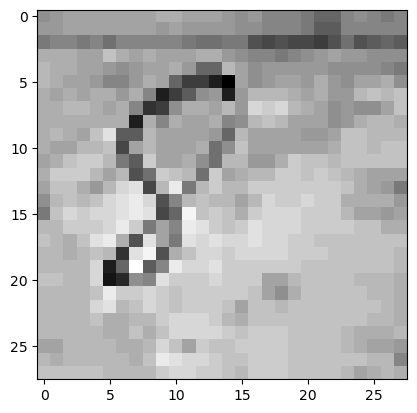

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
This digit is probably a 8


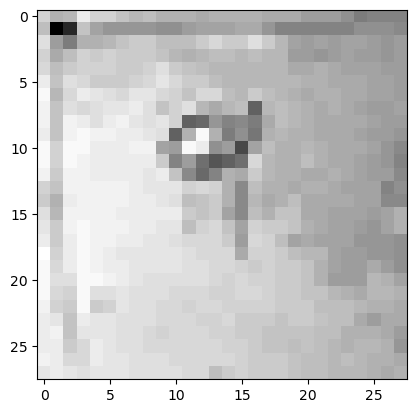

Finished processing all images.


In [3]:
# VISUALIZING THE DATASET TRAINED DATASET
model = tf.keras.models.load_model('handwritten.model.keras')

image_number = 0
while os.path.isfile(f"digits/digits{image_number}.png"):
    try:
        img = cv2.imread(f"digits/favour{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        print(f"This digit is probably a {np.argmax(prediction)}")
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.show()
    except:
        print("Error")
    finally:
        image_number += 1
print("Finished processing all images.")